<a href="https://colab.research.google.com/github/Anoshawott/Foundations-of-Business-Analytics-QBUS1040/blob/master/Least_Squares_Problem_QBUS1040_Tutorial_11_23_10_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Functions for least square problems

In [0]:
import numpy as np

In [0]:
def solve_q (A,b):
    n = A.shape[0] # The no. of rows in Matrix A
    b = b.reshape(n,1) # To make sure b is a column vector
    
    coeff = np.linalg.inv(A.T@A)@A.T@b
    return coeff

# Note: Can replace this cell with own code from week 9 (QR backsubstitution)

In [0]:
def vandermonde (t_list, n):
    m = len(t_list)
    A = np.zeros((m,n))
    for i in range(m):
        for j in range(n):
            A[i,j] = t_list[i]**j
    
    return A

# Simulate data

In [0]:
np.random.seed(0)
N = 100
x = np.zeros((N,1))
y = np.zeros((N,1))
for i in range(N):
    xtemp = 10*np.random.rand(1)
    error = np.random.normal(0,25)
    ytemp = (xtemp-4)*(xtemp-8)*xtemp + error
    x[i,0] = xtemp
    y[i,0] = ytemp

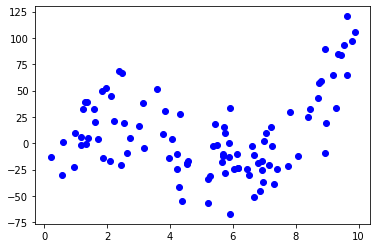

In [0]:
import matplotlib.pyplot as plt
plt.subplots()
plt.plot(x,y, 'bo')
plt.show()

# Eg. of fitting a polynomial function

In [0]:
# No. of coeff is 3
p = 3
A = vandermonde(x,p)
theta = solve_q(A,y)
print('Coeff vector is')
print(theta)
# Generate predictions?
y_pred = A@theta

# RMS?
r = y - y_pred
rms = np.linalg.norm(r)/(len(r)**0.5)
print('RMS is')
print(rms)

Coeff vector is
[[ 52.88995849]
 [-30.37741567]
 [  3.29673133]]
RMS is
29.40479043058222


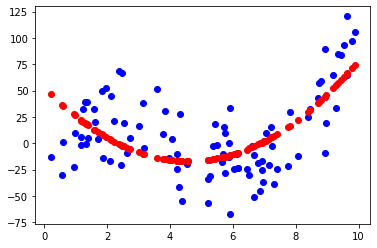

In [0]:
plt.subplots()
plt.plot(x,y, 'bo')
plt.plot(x,y_pred, 'ro')
plt.show()

# Example of validation

In [0]:

N = len(x) # No. of observations
xsplit = np.split(x,[0,20])
xtrain = np.concatenate([xsplit[0], xsplit[2]])
xtest = xsplit[1]

ysplit = np.split(y, [0,20])
ytrain = np.concatenate([ysplit[0], ysplit[2]])
ytest = ysplit[1]

# Fit the polynomial function using training set
p = 4
Atrain = vandermonde(xtrain, p)
theta = solve_q(Atrain, ytrain)

# RMS for train set
y_pre_train = Atrain@theta
rms_train = np.linalg.norm(ytrain - y_pre_train)/(len(ytrain)**0.5)

# RMS for test set
Atest = vandermonde(xtest, p)
y_pre_test = Atest@theta
rms_test = np.linalg.norm(ytest - y_pre_test)/(len(ytest)**0.5)

print('Training rms', rms_train)
print('Test rms', rms_test)

Training rms 23.5955179323841
Test rms 24.671469186557406


In [0]:
# 5 folds cross validation
# 5 polynomial functions
train_rms = np.zeros((5,5))
test_rms = np.zeros((5,5))
# A vector for 5 poly functions
num_coeff_v = [2,3,5,7,20]
N = len(x) # No. of observations

for i in range(5):
    # For each fold (each cross validation)
    for j in range(len(num_coeff_v)):
        # For each poly function
        
        # 1. Split the data into train and test
        xsplit = np.split(x, [i*(N//5),(i+1)*(N//5)])
        xtrain = np.concatenate([xsplit[0], xsplit[2]])
        xtest = xsplit[1]
        
        ysplit = np.split(y, [i*(N//5),(i+1)*(N//5)])
        ytrain = np.concatenate([ysplit[0], ysplit[2]])
        ytest = ysplit[1]
        
        # 2. Fit the polynomial function using the training set
        p = num_coeff_v[j]
        Atrain = vandermonde(xtrain, p)
        theta = solve_q(Atrain, ytrain)
        
        # 3. Prediction and RMS
        y_pre_train = Atrain@theta
        rms_train = np.linalg.norm(ytrain - y_pre_train)/(len(ytrain)**0.5)
        Atest = vandermonde(xtest, p)
        y_pre_test = Atest@theta
        rms_test = np.linalg.norm(ytest - y_pre_test)/(len(ytest)**0.5)
        
        # 4. Record the RMS for training and test
        rms_test = np.linalg.norm(y_pre_test - ytest)/(len(ytest)**0.5)
        rms_train = np.linalg.norm(y_pre_train - ytrain)/(len(ytrain)**0.5)
        test_rms[i, j] = round(rms_test, 4)
        train_rms[i, j] = round(rms_train, 4)

In [0]:
train_rms

array([[  34.8999,   29.0571,   23.4608,   23.3617,  581.1029],
       [  36.5907,   29.5729,   23.8891,   23.8217,  464.2549],
       [  38.5162,   30.6723,   24.0485,   24.0464, 1099.4003],
       [  37.6735,   28.9392,   22.1085,   21.965 , 1097.4019],
       [  37.4843,   27.7107,   23.0365,   22.6625, 2203.1443]])

In [0]:
test_rms

array([[  46.826 ,   32.3828,   24.6051,   24.8894,  519.2588],
       [  39.9403,   29.0568,   22.2599,   22.5491,  652.1016],
       [  31.4439,   24.0934,   21.9275,   21.9363,  568.6641],
       [  35.9966,   32.5259,   29.612 ,   31.2594,  767.7463],
       [  36.2491,   36.5152,   26.4281,   28.8129, 2328.4711]])